# Problem definition: 
The main goal is to predict the triptype for which the customer is visiting the walmart so that we see which triptype is significantly creating customers attraction. 

We are building follwing classification tree machine learning models using k-fold cross validation techiques.

Decision Tree
Random Forest
Bagging

# Creation of base dataset

#### Create data set for walmart trip type

In [418]:
# Following are several helpful packages to load in 
# Imported Libraries are as fallows
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Classification tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [419]:
# Read the training data set
train_dataset=pd.read_csv("C:\\Sridhar\\AI_ML\\Algorithms\\datasets\\walmart_DataSet\\train.csv")
test_dataset=pd.read_csv("C:\\Sridhar\\AI_ML\\Algorithms\\datasets\\walmart_DataSet\\test.csv")

In [421]:
train_dataset.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [422]:
train_dataset.shape

(647054, 7)

In [423]:
test_dataset.head()

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,1,Friday,7.250339e+10,1,SHOES,3002.0
1,1,Friday,1.707711e+09,1,DAIRY,1526.0
2,1,Friday,8.947000e+10,1,DAIRY,1431.0
3,1,Friday,8.849121e+10,1,GROCERY DRY GOODS,3555.0
4,2,Friday,2.840015e+09,1,DSD GROCERY,4408.0


In [424]:
train_dataset.shape,test_dataset.shape

((647054, 7), (653646, 6))

In [425]:
# train_dataset=train_dataset[0:50000]

In [426]:
# test_dataset=test_dataset[0:50000]

In [427]:
visitNumbers = test_dataset['VisitNumber']

In [428]:
visitNumbers.head()

0    1
1    1
2    1
3    1
4    2
Name: VisitNumber, dtype: int64

# Pre Processing

## Memory management 

In [429]:
 def memoryManagement(base_dataset):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    df=base_dataset
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))    
    return df

In [430]:
train_dataset = memoryManagement(train_dataset)

Memory usage of dataframe is 34.56 MB
Memory usage after optimization is: 9.26 MB
Decreased by 73.2%


In [433]:
train_dataset.shape

(647054, 7)

In [434]:
test_dataset = memoryManagement(test_dataset)

Memory usage of dataframe is 8.11 MB


TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


In [435]:
test_dataset.shape

(653646, 6)

## Null value treatement

In [436]:
def null_values(base_dataset):
    print(base_dataset.isna().sum())
    # null value percentage     
    null_value_table=(base_dataset.isna().sum()/base_dataset.shape[0])*100
    # null value percentage beyond threshold drop , else treat the columns 
    
    retained_columns=null_value_table[null_value_table<int(input())].index
    #if any variable as null value greater than input(like 30% of the data) 
    #value than those variable are consider as drop
    drop_columns=null_value_table[null_value_table>int(input())].index
    base_dataset.drop(drop_columns,axis=1,inplace=True)
    len(base_dataset.isna().sum().index)
    cont=base_dataset.describe().columns
    cat=[i for i in base_dataset.columns if i not in base_dataset.describe().columns]
    for i in cat:
        base_dataset[i].fillna(base_dataset[i].value_counts().index[0],inplace=True)
    for i in cont:
        base_dataset[i].fillna(base_dataset[i].median(),inplace=True)
    print(base_dataset.isna().sum())
    return base_dataset,cat,cont

In [437]:
train_dataset,cat_1,cont_1=null_values(train_dataset)

TripType                    0
VisitNumber                 0
Weekday                     0
Upc                      4129
ScanCount                   0
DepartmentDescription    1361
FinelineNumber           4129
dtype: int64
30
30
TripType                 0
VisitNumber              0
Weekday                  0
Upc                      0
ScanCount                0
DepartmentDescription    0
FinelineNumber           0
dtype: int64


In [438]:
test_dataset,cat_2,cont_2=null_values(test_dataset)

VisitNumber                 0
Weekday                     0
Upc                      3986
ScanCount                   0
DepartmentDescription    1328
FinelineNumber           3986
dtype: int64
30
30
VisitNumber              0
Weekday                  0
Upc                      0
ScanCount                0
DepartmentDescription    0
FinelineNumber           0
dtype: int64


In [439]:
train_dataset.shape

(647054, 7)

## Outlier treatment 

In [440]:
def outliers_transform(train_dataset):
    for i in train_dataset.var().sort_values(ascending=False).index[1:10]:
        x=np.array(train_dataset[i])
        qr1=np.quantile(x,0.25)
        qr3=np.quantile(x,0.75)
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        y=[]
        """Based on clients input(ltv,utv) run the below code """
        for p in x:
            if p <ltv or p>utv:
                y.append(np.median(x))
            else:
                y.append(p)
        train_dataset[i]=y

In [441]:
def outliers_transform(test_dataset):
    for i in test_dataset.var().sort_values(ascending=False).index[1:10]:
        x=np.array(test_dataset[i])
        qr1=np.quantile(x,0.25)
        qr3=np.quantile(x,0.75)
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        y=[]
        """Based on clients input(ltv,utv) run the below code """
        for p in x:
            if p <ltv or p>utv:
                y.append(np.median(x))
            else:
                y.append(p)
        test_dataset[i]=y

In [442]:
outliers_transform(train_dataset)

In [446]:
train_dataset.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,39.0,5,Friday,6.811315e+10,1.0,FINANCIAL SERVICES,1000.0
1,30.0,7,Friday,6.053881e+10,1.0,SHOES,8928.0
2,30.0,7,Friday,7.410811e+09,1.0,PERSONAL CARE,4504.0
3,26.0,8,Friday,2.238404e+09,1.0,PAINT AND ACCESSORIES,3564.0
4,26.0,8,Friday,2.006614e+09,1.0,PAINT AND ACCESSORIES,1017.0


In [444]:
outliers_transform(test_dataset)

In [445]:
test_dataset.shape

(653646, 6)

## Dummy variables

In [408]:
# dummy_columns=[]
# for i in base_dataset_1.columns:
#     if(base_dataset_1[i].nunique()>=3) & (base_dataset_1[i].nunique()<5):
#         print(i)

In [447]:
base_dataset[cat_1].head()

,Weekday,DepartmentDescription
0,Friday,FINANCIAL SERVICES
1,Friday,SHOES
2,Friday,PERSONAL CARE
3,Friday,PAINT AND ACCESSORIES
4,Friday,PAINT AND ACCESSORIES


In [448]:
dummies_tables_for_train=pd.get_dummies(train_dataset[cat_1])

In [314]:
dummies_tables_for_train.head()

,Weekday_Friday,Weekday_Saturday,Weekday_Sunday,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,DepartmentDescription_BEAUTY,DepartmentDescription_BEDDING,...,DepartmentDescription_SEAFOOD,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [449]:
## Merging dummy dataframe to the base_dataset_1
for i in dummies_tables_for_train:
    train_dataset[i]=dummies_tables_for_train[i]

In [450]:
train_dataset.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,Weekday_Friday,Weekday_Monday,Weekday_Saturday,...,DepartmentDescription_SEAFOOD,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,39.0,5,Friday,6.811315e+10,1.0,FINANCIAL SERVICES,1000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.0,7,Friday,6.053881e+10,1.0,SHOES,8928.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,30.0,7,Friday,7.410811e+09,1.0,PERSONAL CARE,4504.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26.0,8,Friday,2.238404e+09,1.0,PAINT AND ACCESSORIES,3564.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26.0,8,Friday,2.006614e+09,1.0,PAINT AND ACCESSORIES,1017.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [451]:
dummies_tables_for_test=pd.get_dummies(test_dataset[cat_2])

In [452]:
dummies_tables_for_test.head()

,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,...,DepartmentDescription_SEAFOOD,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [453]:
## Merging dummy dataframe to the base_dataset_1
for i in dummies_tables_for_test:
    test_dataset[i]=dummies_tables_for_test[i]

In [457]:
dummies_tables_for_test.head()

,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,...,DepartmentDescription_SEAFOOD,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [455]:
dummies_tables_for_test.shape, dummies_tables_for_train.shape

((653646, 74), (647054, 75))

In [456]:
cat_1

['Weekday', 'DepartmentDescription']

In [458]:
## Delete cat columns because we converted cat columns to dummy columns
train_dataset = train_dataset.drop(cat_1,axis=1)

In [459]:
train_dataset.head()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,...,DepartmentDescription_SEAFOOD,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,39.0,5,6.811315e+10,1.0,1000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.0,7,6.053881e+10,1.0,8928.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,30.0,7,7.410811e+09,1.0,4504.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26.0,8,2.238404e+09,1.0,3564.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26.0,8,2.006614e+09,1.0,1017.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [460]:
cont_1

Index(['TripType', 'VisitNumber', 'Upc', 'ScanCount', 'FinelineNumber'], dtype='object')

In [461]:
for i in cont_1:
    if i != 'TripType':
        sd = StandardScaler()
        sd.fit(pd.DataFrame(train_dataset[i]))
        z = sd.transform(pd.DataFrame(train_dataset[i]))
        train_dataset[i] = z

In [462]:
train_dataset.head()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,...,DepartmentDescription_SEAFOOD,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,39.0,-1.731243,0.414130,0.0,-0.982779,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.0,-1.731207,0.330831,0.0,1.877030,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,30.0,-1.731207,-0.253448,0.0,0.281193,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26.0,-1.731189,-0.310332,0.0,-0.057886,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26.0,-1.731189,-0.312881,0.0,-0.976647,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [463]:
## Delete cat columns because we converted cat columns to dummy columns
test_dataset = test_dataset.drop(cat_2,axis=1)

In [464]:
for i in cont_2:
    sd = StandardScaler()
    sd.fit(pd.DataFrame(test_dataset[i]))
    z = sd.transform(pd.DataFrame(test_dataset[i]))
    test_dataset[i] = z

In [465]:
test_dataset.head()

,VisitNumber,Upc,ScanCount,FinelineNumber,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,...,DepartmentDescription_SEAFOOD,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,-1.746105,0.462705,0.0,-0.260431,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-1.746105,-0.315320,0.0,-0.793616,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.746105,0.649163,0.0,-0.827933,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.746105,0.638406,0.0,-0.060306,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.746087,-0.302876,0.0,0.247467,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [466]:
train_dataset.shape, test_dataset.shape

((647054, 80), (653646, 78))

## Univariate analysis (EDA)

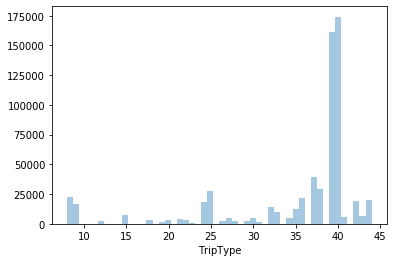

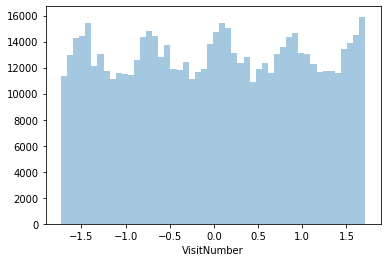

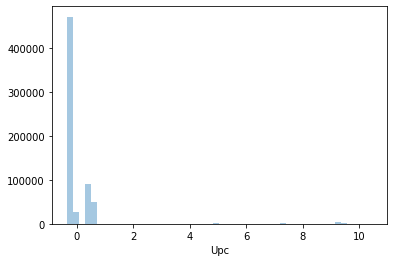

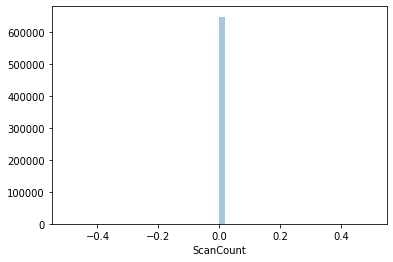

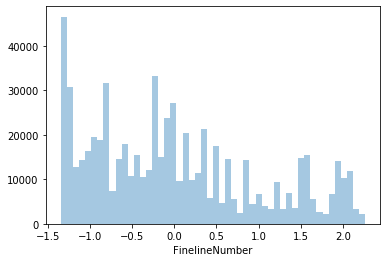

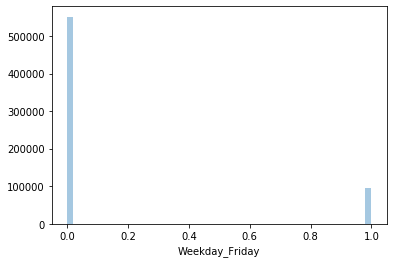

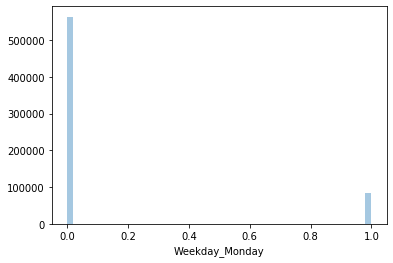

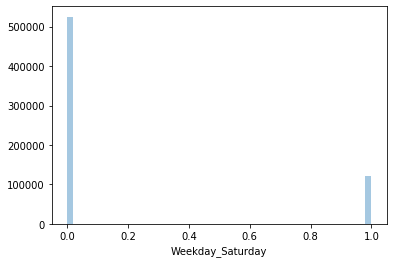

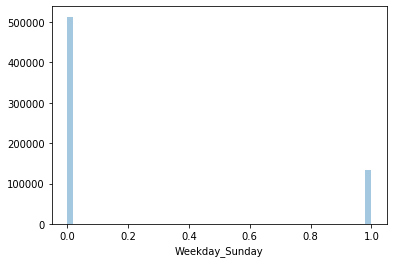

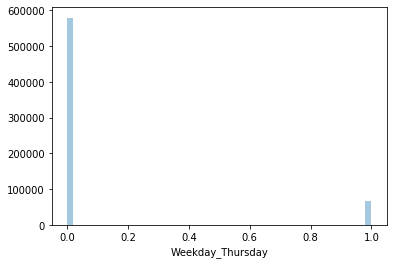

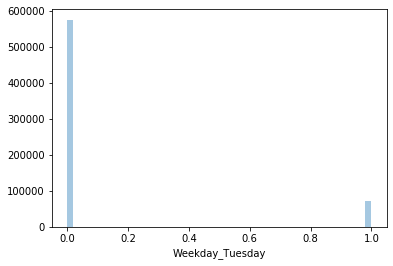

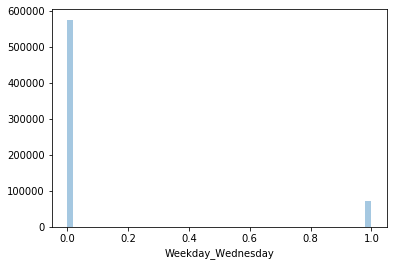

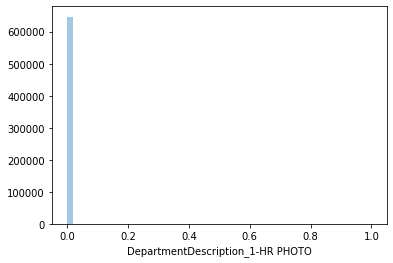

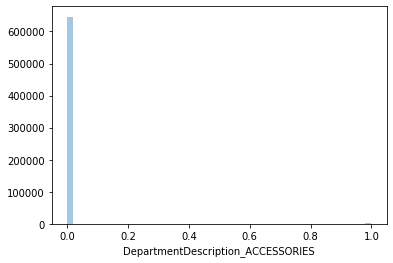

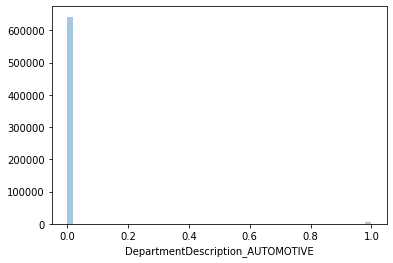

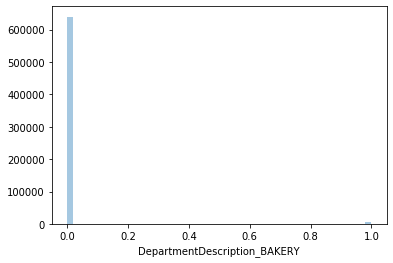

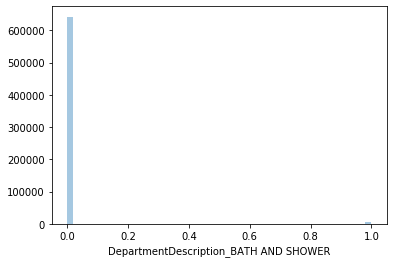

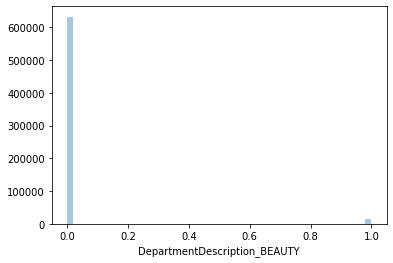

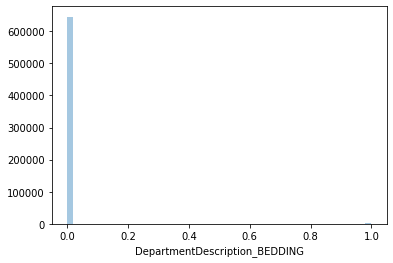

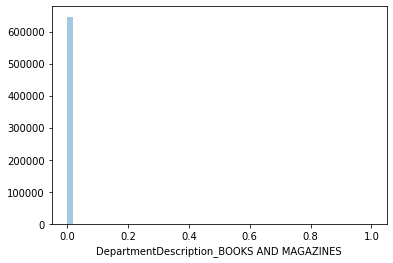

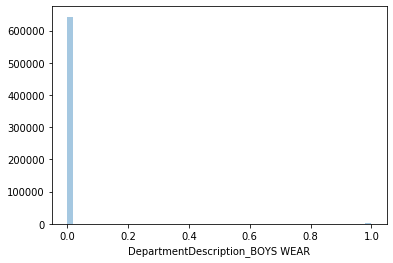

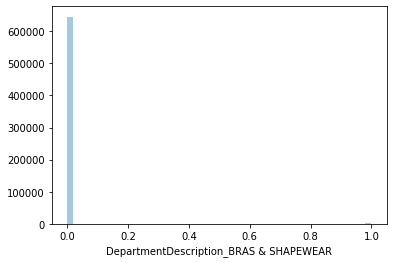

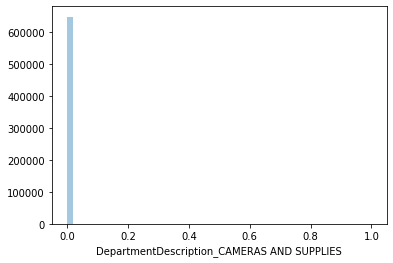

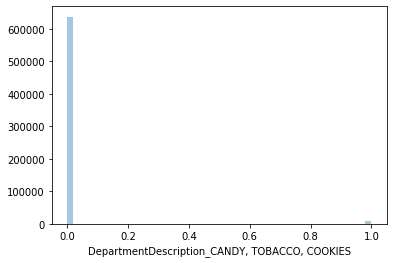

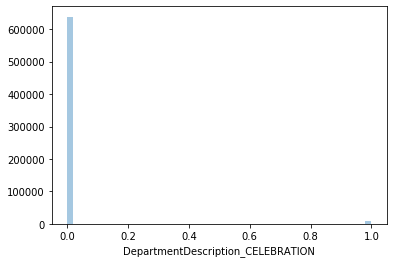

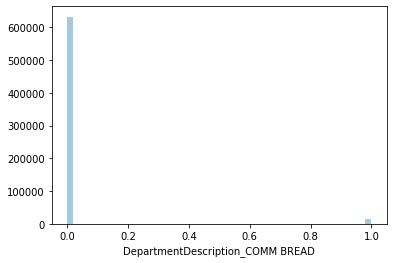

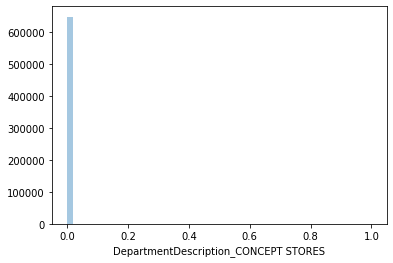

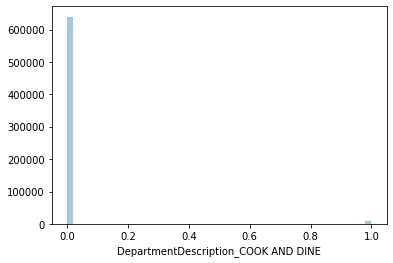

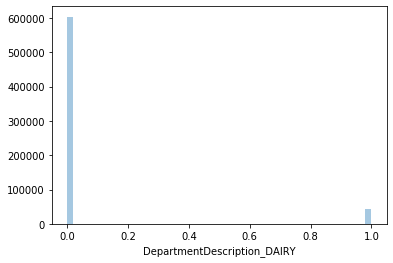

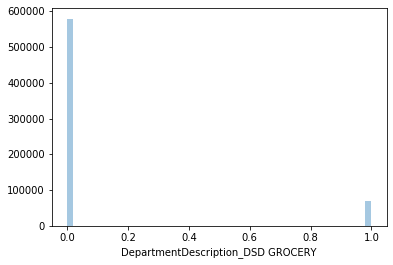

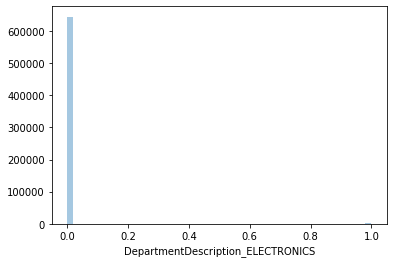

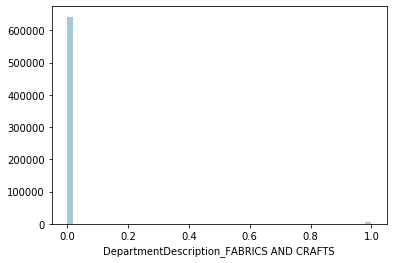

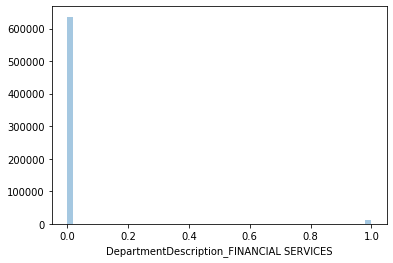

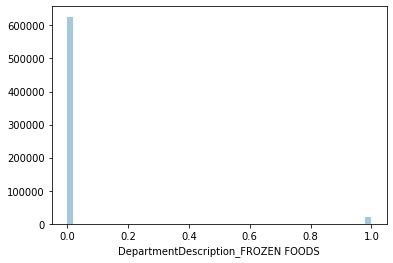

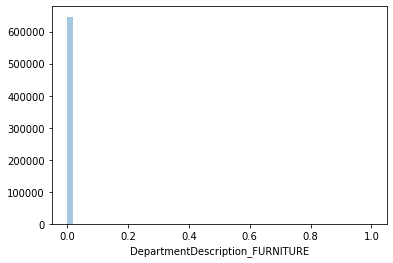

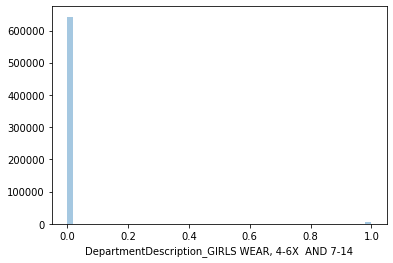

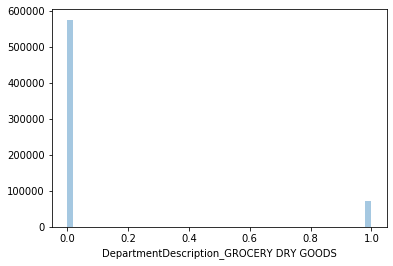

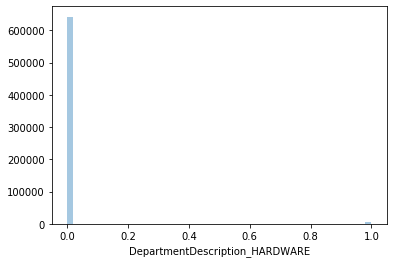

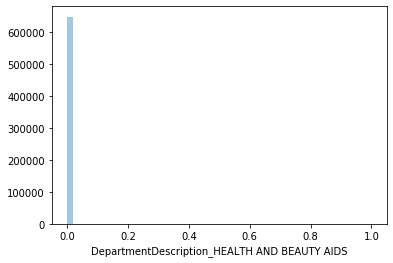

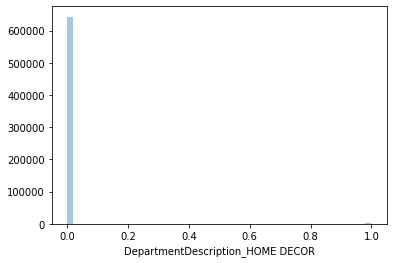

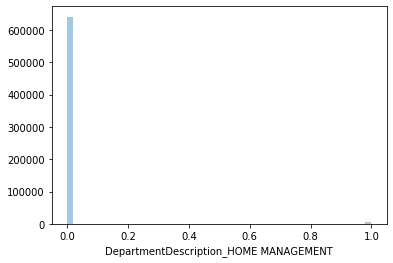

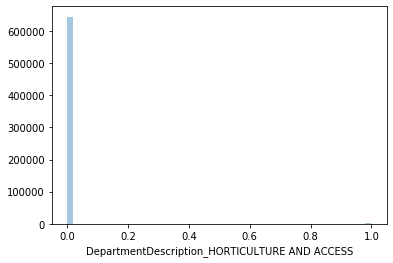

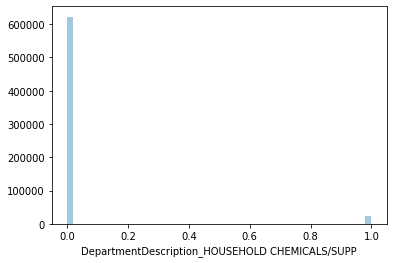

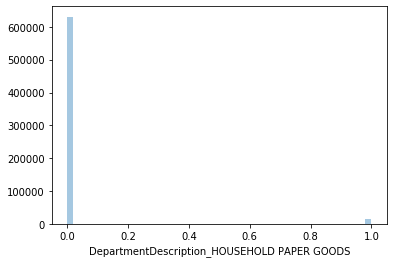

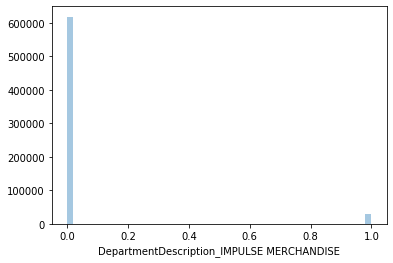

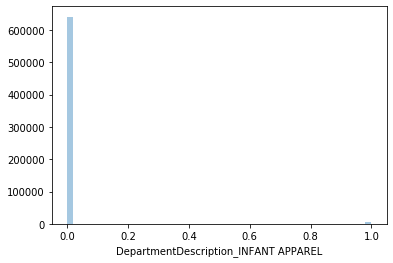

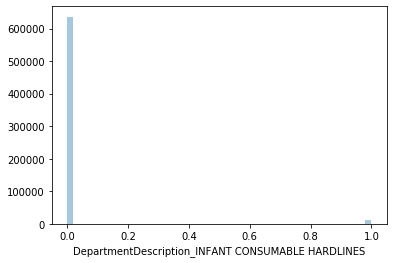

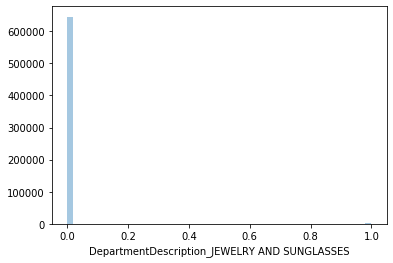

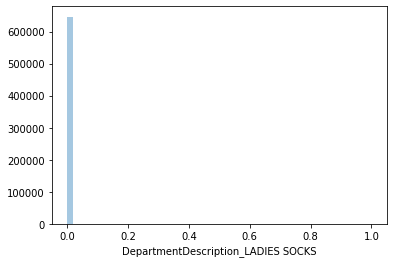

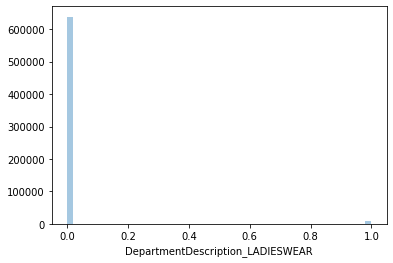

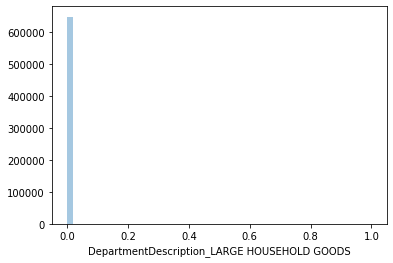

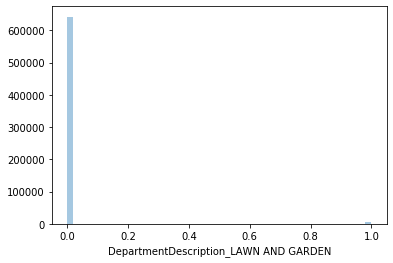

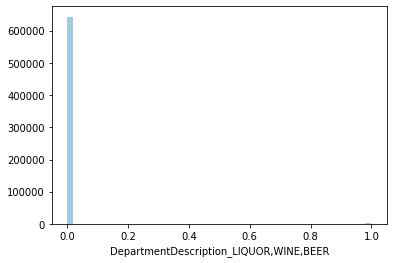

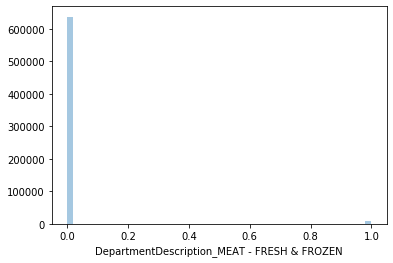

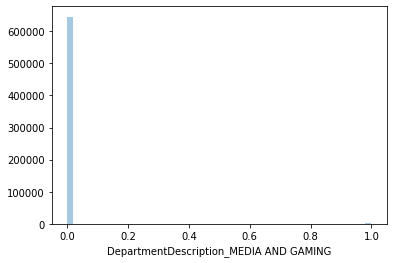

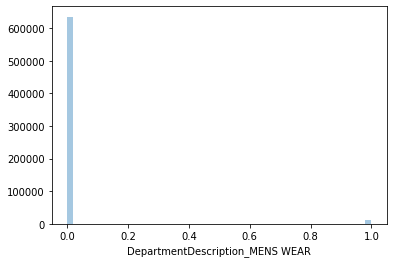

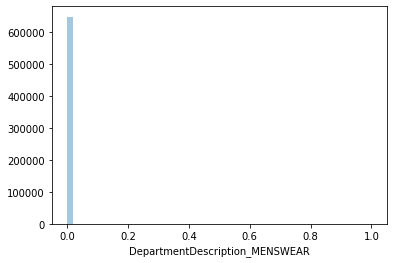

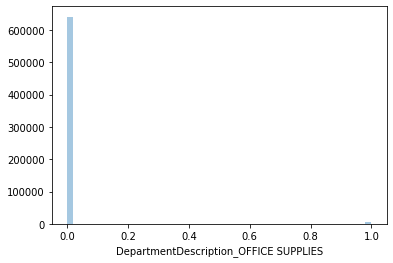

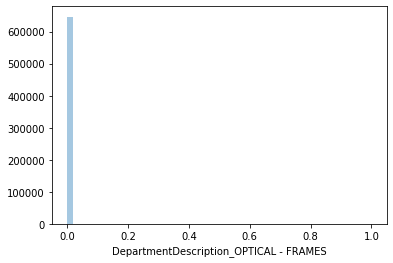

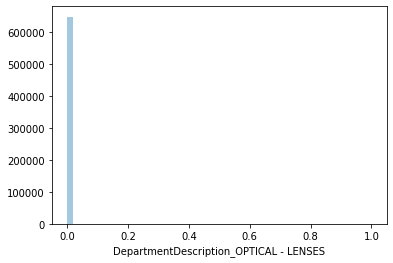

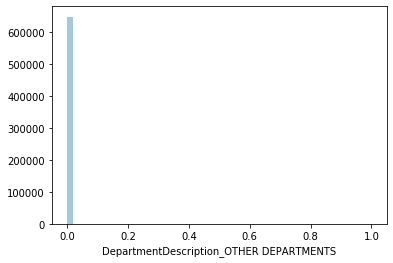

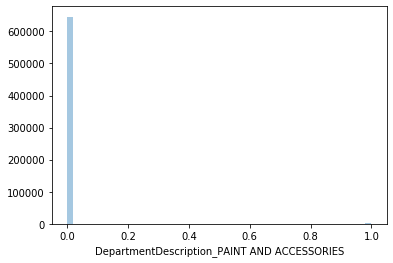

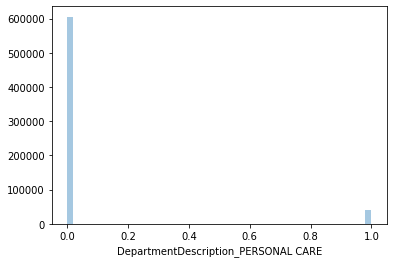

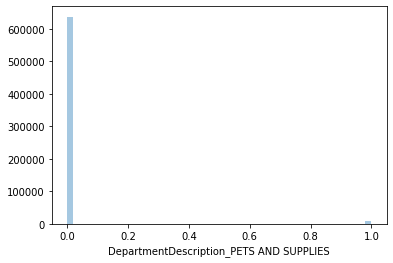

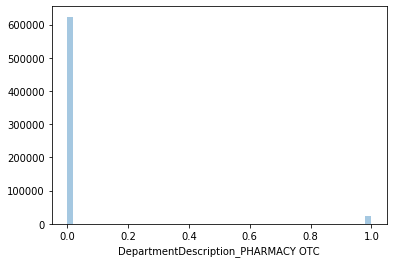

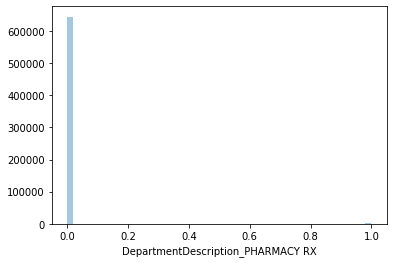

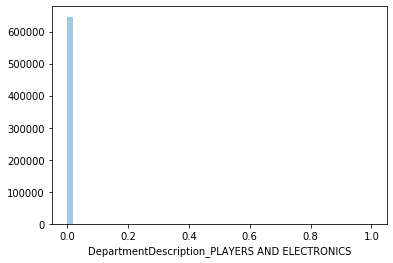

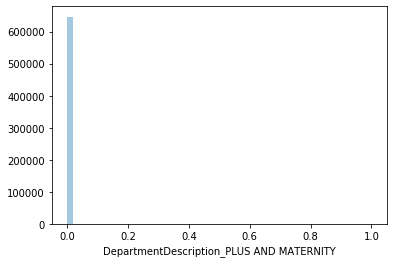

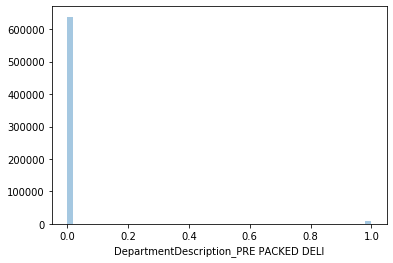

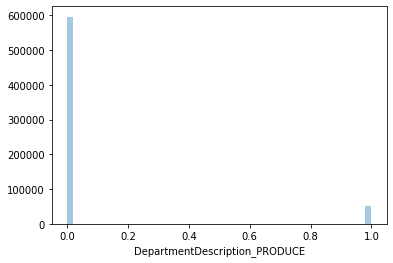

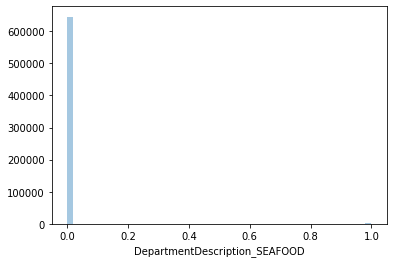

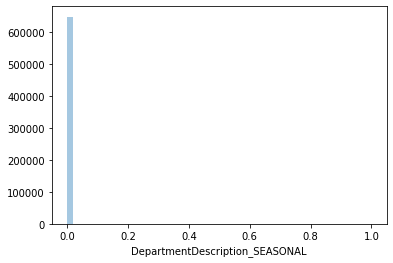

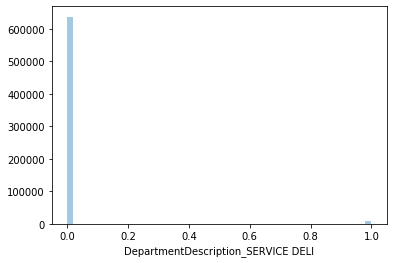

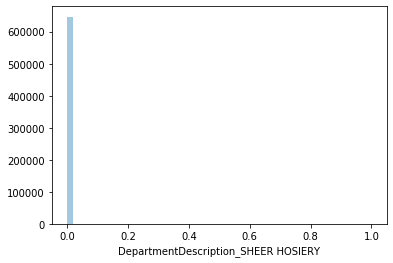

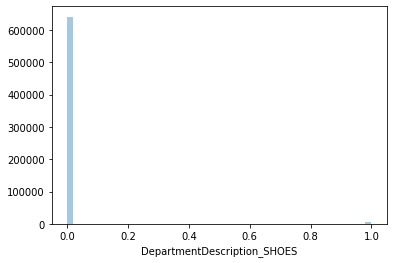

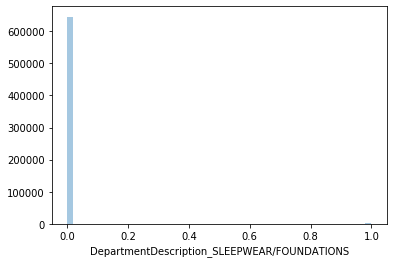

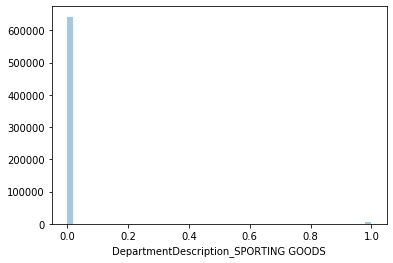

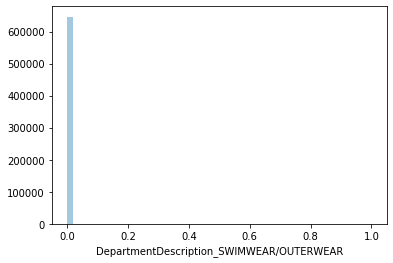

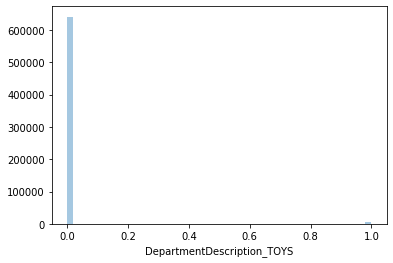

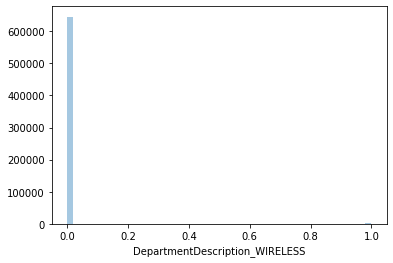

In [467]:
for i in train_dataset.var().index:
    sns.distplot(train_dataset[i],kde=False)
    plt.show()

## Bivariate analysis (EDA)

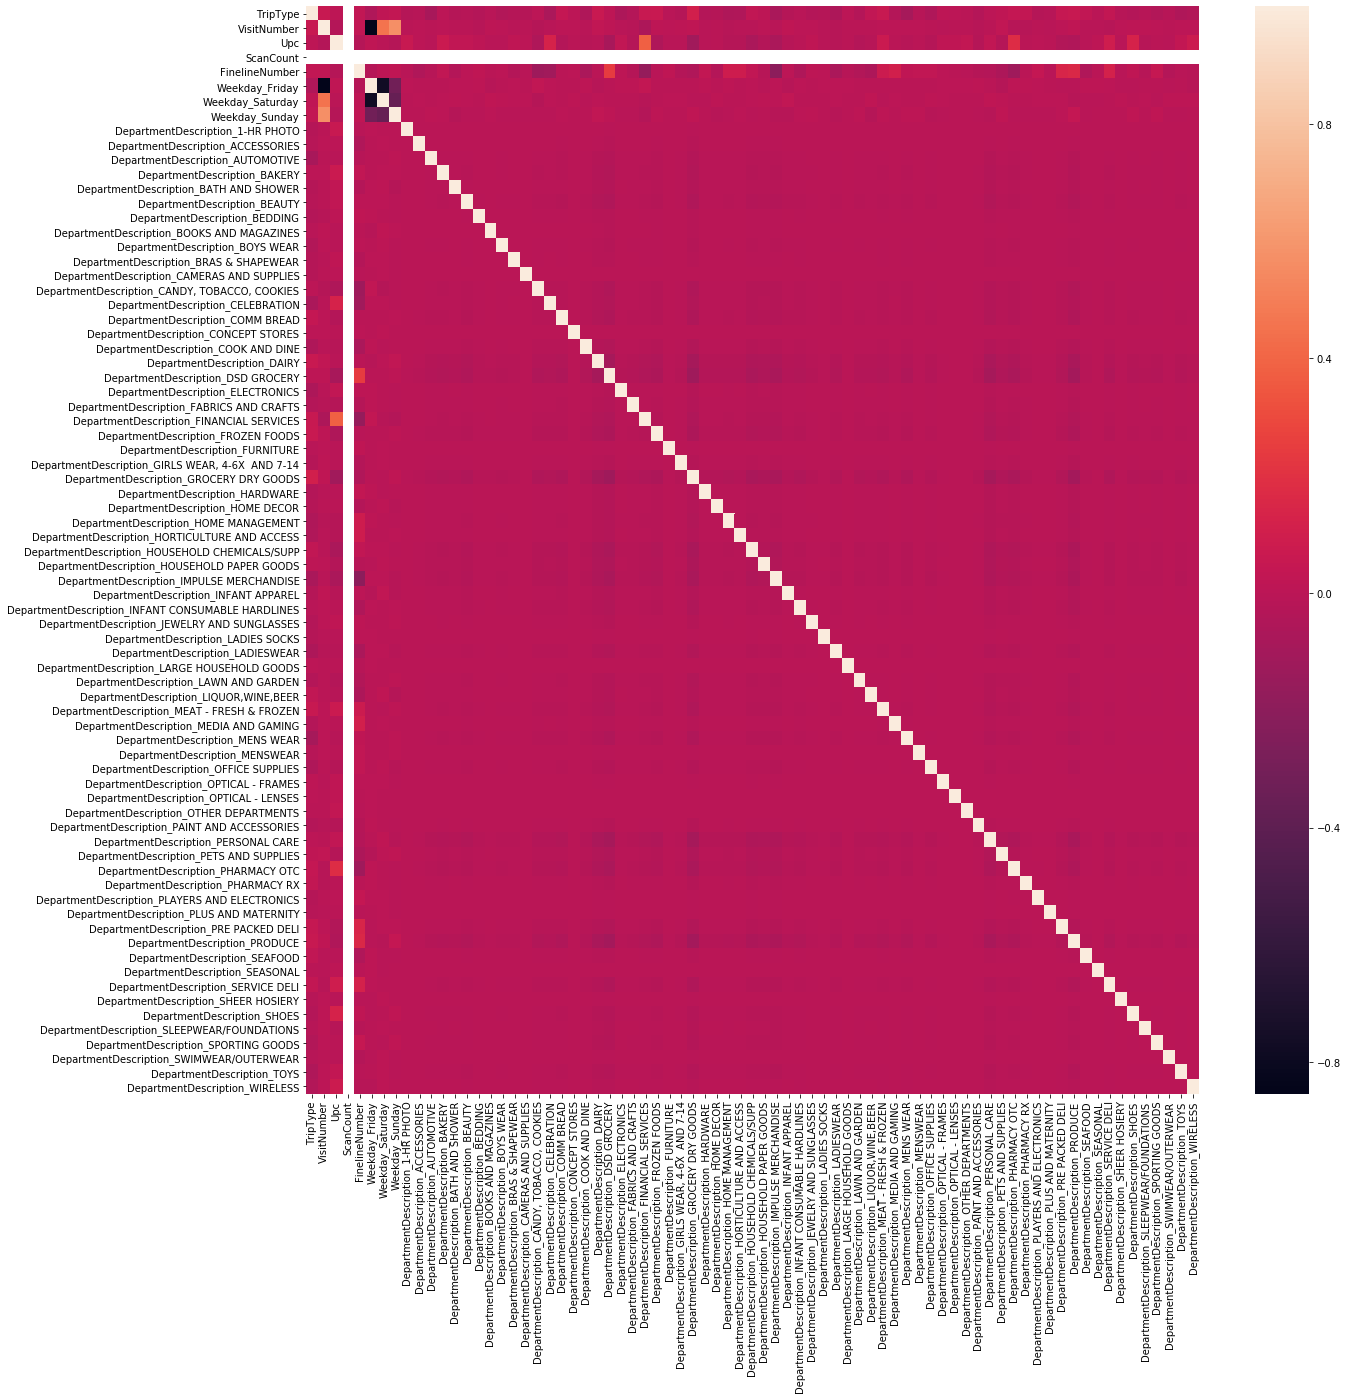

In [333]:
plt.figure(figsize=(20,20))
sns.heatmap(train_dataset.corr())

# Model Building

## Supervised

 ### Classification

In [468]:
train_dataset['TripType'].nunique()

32

In [469]:
## Dummy variables for the TripType which is a Y variable here.
## The TripType column has 32 trip types. Different types of customer select trip type from 32.
y_variables=pd.get_dummies(train_dataset['TripType'])

In [470]:
y_variables.head()

,8.0,9.0,12.0,14.0,15.0,18.0,19.0,20.0,21.0,22.0,...,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [472]:
## Add all columns to X variable expect TripType
x = train_dataset.drop('TripType',axis=1)

In [473]:
x.head()

,VisitNumber,Upc,ScanCount,FinelineNumber,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,...,DepartmentDescription_SEAFOOD,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,-1.731243,0.414130,0.0,-0.982779,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.731207,0.330831,0.0,1.877030,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.731207,-0.253448,0.0,0.281193,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.731189,-0.310332,0.0,-0.057886,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.731189,-0.312881,0.0,-0.976647,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [494]:
x = x.drop('DepartmentDescription_HEALTH AND BEAUTY AIDS',axis=1)

In [495]:
x.shape,test_dataset.shape

((647054, 78), (653646, 78))

In [496]:
x.shape

(647054, 78)

In [498]:
for j in y_variables.columns:
    print("------------------------------------------------------------------------------------")
    print("Following are the results for DecisionTreeClassifier machine learning model for criterion=gini")
    print("")
    dt=DecisionTreeClassifier()
    dt.fit(x,y_variables[j])
    dt.predict(x)
    predict_decisionTree = dt.predict(test_dataset)
#     print("Confusion matrix for test samples and for the TripType {}".format(j))
#     print(confusion_matrix(y_variables[j],dt.predict(test_dataset)))
#     print("Accuracy score for the TripType {}  and for the test data is {} ".format(j,accuracy_score(y_variables[j],dt.predict(test_dataset))))
#     print("Confusion matrix for training samples and for the TripType {}".format(j))   
#     print(confusion_matrix(y_variables[j],dt.predict(x)))
#     print("Accuracy score for the TripType {}  and for the training data is {} ".format(j,accuracy_score(y_variables[j],dt.predict(x))))
#     print("K-Fold results for machine learning model DecisionTreeClassifier() and for the TripType {} is as follows ".format(j))
#     from sklearn.model_selection import cross_val_score
#     print(cross_val_score(DecisionTreeClassifier(),x,y_variables[j],cv=10))

------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model for criterion=gini

------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model for criterion=gini

------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model for criterion=gini

------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model for criterion=gini

------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model for criterion=gini

------------------------------------------------------------------------------------
Following 

In [500]:
predict_decisionTree.shape

(653646,)

In [372]:
# for j in y_variables.columns:
#     print("------------------------------------------------------------------------------------")
#     print("Following are the results for DecisionTreeClassifier machine learning model for criterion=entropy")
#     print("")
#     dt=DecisionTreeClassifier(criterion='entropy')
#     dt.fit(x,y_variables[j])
#     dt.predict(x)
#     dt.predict(test_dataset)
#     print("Confusion matrix for test samples and for the TripType {}".format(j))
#     print(confusion_matrix(y_variables[j],dt.predict(test_dataset)))
#     print("Accuracy score for the TripType {}  and for the test data is {} ".format(j,accuracy_score(y_variables[j],dt.predict(test_dataset))))
#     print("Confusion matrix for training samples and for the TripType {}".format(j))   
#     print(confusion_matrix(y_variables[j],dt.predict(x)))
#     print("Accuracy score for the TripType {}  and for the training data is {} ".format(j,accuracy_score(y_variables[j],dt.predict(x))))
#     print("K-Fold results for machine learning model DecisionTreeClassifier() and for the TripType {} is as follows ".format(j))
#     from sklearn.model_selection import cross_val_score
#     print(cross_val_score(DecisionTreeClassifier(criterion='entropy'),x,y_variables[j],cv=10))

------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model for criterion=entropy

Confusion matrix for test samples and for the TripType 8.0
[[45664  2698]
 [ 1527   111]]
Accuracy score for the TripType 8.0  and for the test data is 0.9155 
Confusion matrix for training samples and for the TripType 8.0
[[48362     0]
 [    0  1638]]
Accuracy score for the TripType 8.0  and for the training data is 1.0 
K-Fold results for machine learning model DecisionTreeClassifier() and for the TripType 8.0 is as follows 
[0.03319336 0.51089782 0.1782     0.141      0.6176     0.7244
 0.797      0.4652     0.84476895 0.964993  ]
------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model for criterion=entropy

Confusion matrix for test samples and for the TripType 9.0
[[46986  1685]
 [ 1274    55]]
A

Confusion matrix for test samples and for the TripType 25.0
[[46090  1941]
 [ 1862   107]]
Accuracy score for the TripType 25.0  and for the test data is 0.92394 
Confusion matrix for training samples and for the TripType 25.0
[[48031     0]
 [    0  1969]]
Accuracy score for the TripType 25.0  and for the training data is 1.0 
K-Fold results for machine learning model DecisionTreeClassifier() and for the TripType 25.0 is as follows 
[0.95840832 0.5918     0.501      0.7222     0.7002     0.6616
 0.6904     0.9304     0.9404     0.94578916]
------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model for criterion=entropy

Confusion matrix for test samples and for the TripType 26.0
[[49631   150]
 [  218     1]]
Accuracy score for the TripType 26.0  and for the test data is 0.99264 
Confusion matrix for training samples and for the TripType 26.0
[[49781     0]
 [    0   219]]
Accuracy sc

[[48347     0]
 [    0  1653]]
Accuracy score for the TripType 36.0  and for the training data is 1.0 
K-Fold results for machine learning model DecisionTreeClassifier() and for the TripType 36.0 is as follows 
[0.92181564 0.9660068  0.51789642 0.8908     0.9652     0.5482
 0.1302     0.33446689 0.47309462 0.96839368]
------------------------------------------------------------------------------------
Following are the results for DecisionTreeClassifier machine learning model for criterion=entropy

Confusion matrix for test samples and for the TripType 37.0
[[44747  2319]
 [ 2755   179]]
Accuracy score for the TripType 37.0  and for the test data is 0.89852 
Confusion matrix for training samples and for the TripType 37.0
[[47066     0]
 [    0  2934]]
Accuracy score for the TripType 37.0  and for the training data is 1.0 
K-Fold results for machine learning model DecisionTreeClassifier() and for the TripType 37.0 is as follows 
[0.93781244 0.51429714 0.25294941 0.37672466 0.3468     0.

In [ ]:
predict_decisionTree

In [509]:
predict_randomForest = []
for j in y_variables.columns:
    print("------------------------------------------------------------------------------------")
    print("Following are the results for RandomForestClassifier machine learning model for criterion=gini")
    print("")
    dt=RandomForestClassifier()
    dt.fit(x,y_variables[j])
#     dt.predict(x)
    predict_randomForest.append(dt.predict(test_dataset))
#     print("Confusion matrix for test samples and for the TripType {}".format(j))
#     print(confusion_matrix(y_variables[j],dt.predict(test_dataset)))
#     print("Accuracy score for the TripType {}  and for the test data is {} ".format(j,accuracy_score(y_variables[j],dt.predict(test_dataset))))
#     print("Confusion matrix for training samples and for the TripType {}".format(j))   
#     print(confusion_matrix(y_variables[j],dt.predict(x)))
#     print("Accuracy score for the TripType {}  and for the training data is {} ".format(j,accuracy_score(y_variables[j],dt.predict(x))))
#     print("K-Fold results for machine learning model RandomForestClassifier() and for the TripType {} is as follows ".format(j))
#     from sklearn.model_selection import cross_val_score
#     print(cross_val_score(RandomForestClassifier(),x,y_variables[j],cv=10))

------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


------------------------------------------------------------------------------------
Following are the results for RandomForestClassifier machine learning model for criterion=gini



C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [512]:
predict_randomForest

[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 1, 0, 0], dtype=uint8),
 array([0, 1, 1, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dt

In [ ]:
# for j in y_variables.columns:
#     print("------------------------------------------------------------------------------------")
#     print("Following are the results for RandomForestClassifier machine learning model for criterion=entropy")
#     print("")
#     dt=RandomForestClassifier(criterion='entropy')
#     dt.fit(x,y_variables[j])
#     dt.predict(x)
#     dt.predict(test_dataset)
#     print("Confusion matrix for test samples and for the TripType {}".format(j))
#     print(confusion_matrix(y_variables[j],dt.predict(test_dataset)))
#     print("Accuracy score for the TripType {}  and for the test data is {} ".format(j,accuracy_score(y_variables[j],dt.predict(test_dataset))))
#     print("Confusion matrix for training samples and for the TripType {}".format(j))   
#     print(confusion_matrix(y_variables[j],dt.predict(x)))
#     print("Accuracy score for the TripType {}  and for the training data is {} ".format(j,accuracy_score(y_variables[j],dt.predict(x))))
#     print("K-Fold results for machine learning model RandomForestClassifier() and for the TripType {} is as follows ".format(j))
#     from sklearn.model_selection import cross_val_score
#     print(cross_val_score(RandomForestClassifier(criterion='entropy'),x,y_variables[j],cv=10))

In [ ]:
for j in y_variables.columns:
    print("------------------------------------------------------------------------------------")
    print("Following are the results for RandomForestClassifier machine learning model for criterion=entropy")
    print("")
    dt=BaggingClassifier()
    dt.fit(x,y_variables[j])
    dt.predict(x)
    predict_bagging = dt.predict(test_dataset)
    print("Confusion matrix for test samples and for the TripType {}".format(j))
    print(confusion_matrix(y_variables[j],dt.predict(test_dataset)))
    print("Accuracy score for the TripType {}  and for the test data is {} ".format(j,accuracy_score(y_variables[j],dt.predict(test_dataset))))
    print("Confusion matrix for training samples and for the TripType {}".format(j))   
    print(confusion_matrix(y_variables[j],dt.predict(x)))
    print("Accuracy score for the TripType {}  and for the training data is {} ".format(j,accuracy_score(y_variables[j],dt.predict(x))))
    print("K-Fold results for machine learning model RandomForestClassifier() and for the TripType {} is as follows ".format(j))
    from sklearn.model_selection import cross_val_score
    print(cross_val_score(BaggingClassifier(),x,y_variables[j],cv=10))

In [513]:
pd.DataFrame([visitNumbers,predict_randomForest]).T.to_csv("final_submission_walmart_triptype.csv")

AttributeError: 'builtin_function_or_method' object has no attribute 'get_indexer'

In [533]:
test = pd.DataFrame(predict_randomForest)

In [516]:
test.shape

(32, 653646)

In [534]:
test = test.T

In [535]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [536]:
test['VisitNumber']=visitNumbers

In [537]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,VisitNumber
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [523]:
visitNumbers.shape

(653646,)

In [538]:
test.to_csv("final_submission_walmart_triptype.csv")

In [525]:
test.T.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
